(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
-----------------------------------------------------------------------
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
-----------------------------------------------------------------------


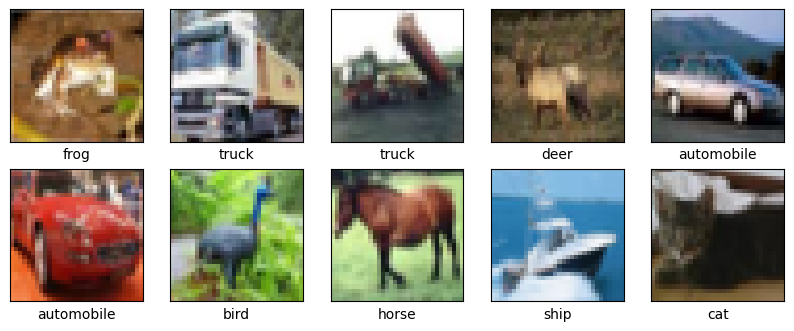

-----------------------------------------------------------------------
-----------------------------------------------------------------------
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 6, 6, 

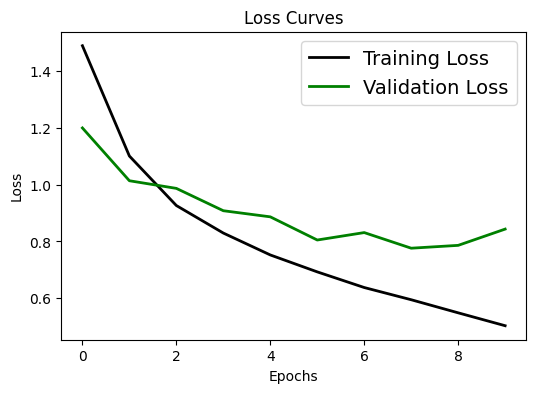

-----------------------------------------------------------------------
313/313 - 5s - loss: 0.8436 - accuracy: 0.7193 - 5s/epoch - 17ms/step
Test accuracy: 0.7192999720573425
-----------------------------------------------------------------------
[3 8 8 ... 5 1 7]
-----------------------------------------------------------------------


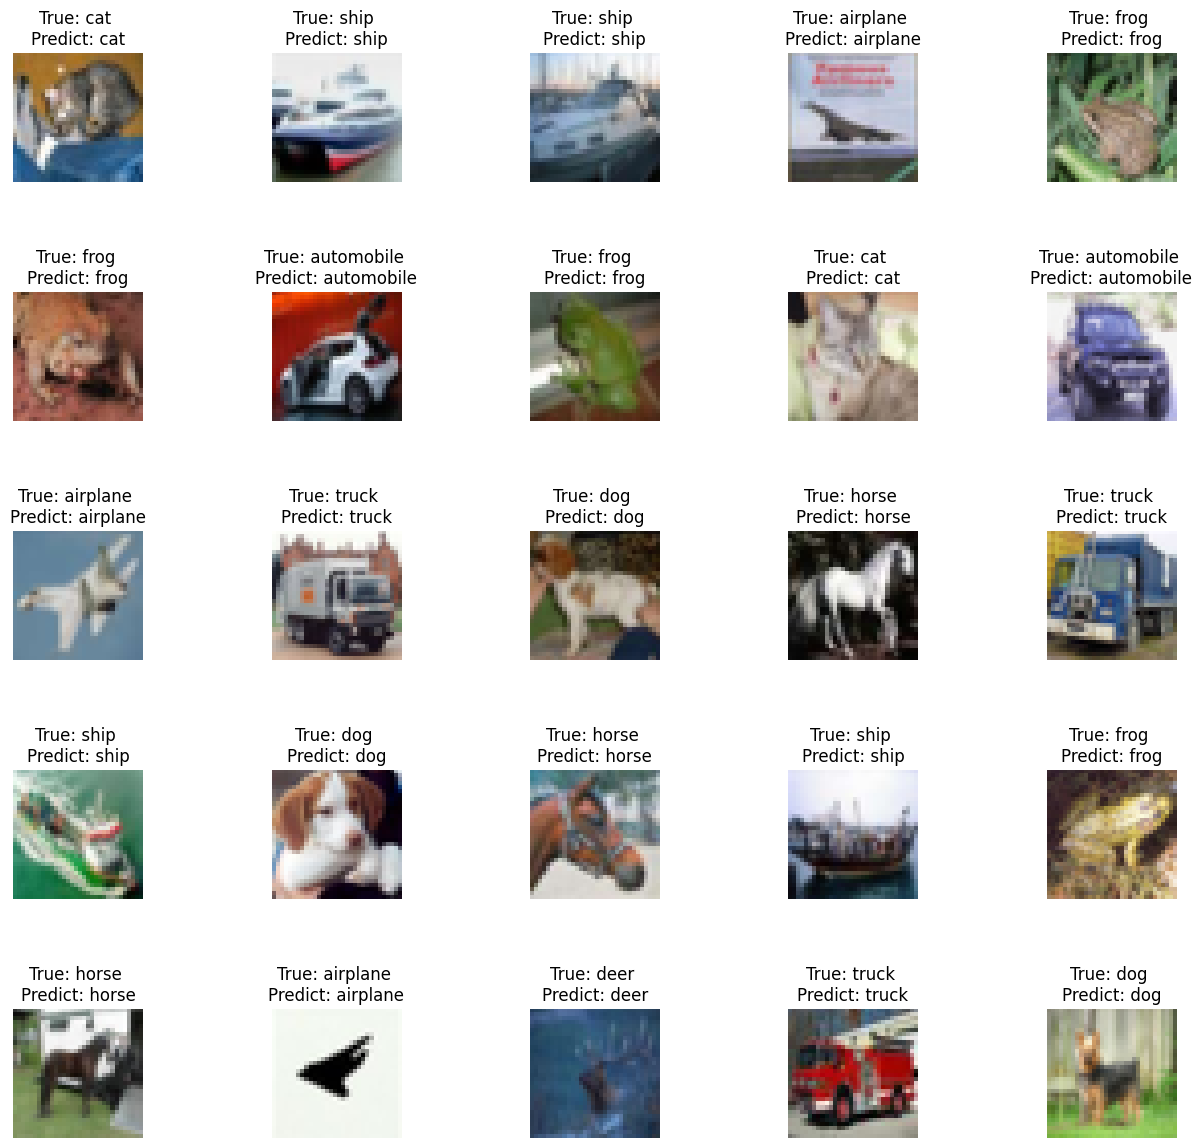

-----------------------------------------------------------------------
The loss graph displays how the training and validation loss change during the training. 
        At first, the training loss goes down quickly, showing the model is learning well. But later, the validation loss begins to go up, suggesting the model is starting to 
        overfocus on the training data. And also, Using early stopping here would be beneficial because it can stop the training before the model begins to overfit the data, which helps prevent overfitting. 
        This is achieved by keeping an eye on the validation loss and ending the training when it begins to rise.
-----------------------------------------------------------------------------------------
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 32, 32, 32)        896       
                              

In [11]:
from keras import datasets, layers, models
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

print('-----------------------------------------------------------------------')

# Checking the number of unique classes

print(np.unique(train_labels))
print(np.unique(test_labels))

print('-----------------------------------------------------------------------')

# Creating a list of all the class labels

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Visualizing some of the images from the training dataset

plt.figure(figsize=[10,10])

for i in range (10):    # for first 10 images
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

print('-----------------------------------------------------------------------')

# Converting the pixels data to float type

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Normalize input

train_images = train_images / 255
test_images = test_images / 255

# change target class to one hot encoding
# use ‘to_categorical’ function

num_classes = 10

train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

print('-----------------------------------------------------------------------')

# Creating a sequential model and adding layers to it

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Checking the model summary

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, batch_size=64, epochs=10, validation_data=(test_images, test_labels))

print('-----------------------------------------------------------------------')

# Loss curve

plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

# Show the loss curve

plt.show()

print('-----------------------------------------------------------------------')

# Making the Predictions

# accuracy of test_images

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('Test accuracy:', test_acc)

print('-----------------------------------------------------------------------')

# Converting the predictions into label index

pred_classes = np.argmax(test_labels, axis=1)

print(pred_classes)

print('-----------------------------------------------------------------------')

# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

plt.show()

print('-----------------------------------------------------------------------')


# 2) Explain the result of loss curve plotting. Explain whether it is advantageous to apply Early stopping method here.

print('''The loss graph displays how the training and validation loss change during the training.
        At first, the training loss goes down quickly, showing the model is learning well. But later, the validation loss begins to go up, suggesting the model is starting to
        overfocus on the training data. And also, Using early stopping here would be beneficial because it can stop the training before the model begins to overfit the data, which helps prevent overfitting.
        This is achieved by keeping an eye on the validation loss and ending the training when it begins to rise.''')


print('-----------------------------------------------------------------------------------------')


# 3) Add BatchNormalization layer right after every Conv2D layer. Compare the results.

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Checking the model summary

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, batch_size=64, epochs=10, validation_data=(test_images, test_labels))

print('-----------------------------------------------------------------------')

# 4) Add Dropout layer right after every MaxPool2D layer (from original code). Compare the results.


model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Checking the model summary

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, batch_size=64, epochs=10, validation_data=(test_images, test_labels))

print('-----------------------------------------------------------------------')

# 5)  Add 2-3 more Conv2D layers right before Flatten layer. Compare the results

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Checking the model summary

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, batch_size=64, epochs=10, validation_data=(test_images, test_labels))

print('''Explaination :: Usually, including additional Conv2D layers can assist the model in capturing more intricate details from the input data, possibly enhancing performance. Yet, too many layers might cause overfitting and higher computational burden.
          The ideal number of layers varies based on the dataset and the problem at hand.''')

print('-----------------------------------------------------------------------')


# 6) Increase ‘epochs’ values and compare the results.

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Checking the model summary

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, batch_size=64, epochs=15, validation_data=(test_images, test_labels))

print('-----------------------------------------------------------------------')



